Feel free to use the following function and/or code for HW2 in BMED 7610

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# n = number of neurons
# fr = firing rate (e.g., 10 Hz)
# synchrony = parameter that varies synchrony (0 is low, larger values are high)
# duration = duration of spike train (e.g., 1 s)
# dt = time step of integration, for returning the binned spikes

def generate_spike_trains(n,fr,synchrony,duration,dt):

  num_spikes_per_neuron = round(fr * duration)
  spike_times = (np.random.vonmises(0.,synchrony,size=(n,num_spikes_per_neuron)) + np.pi) * duration/(2*np.pi)

  # discretizing spikes
  num_steps = round(duration/dt)
  t = np.linspace(0,num_steps*dt,num_steps)
  spike_samples = np.rint(spike_times/dt)
  spikes = np.zeros((n,num_steps))

  for nn in range(n):
    spikes[nn,spike_samples[nn,:].astype(int)] = 1.

  return spikes, t, spike_times

In [3]:
# parameters for making spike trains
duration = 1 #s
dt = 1e-5 #s
n=100
firing_rate = 10 #Hz
ks = [0,1,10,100,1000,10000]

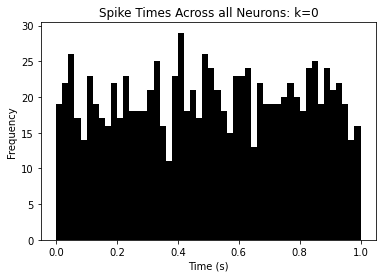

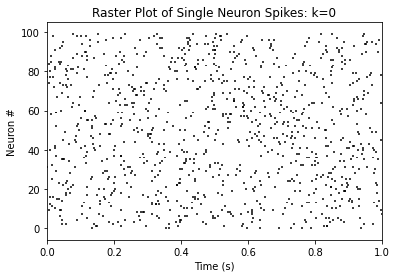

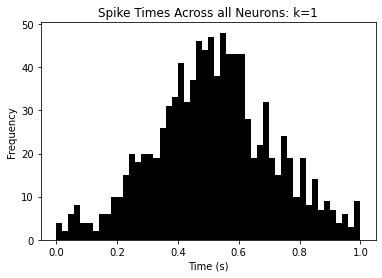

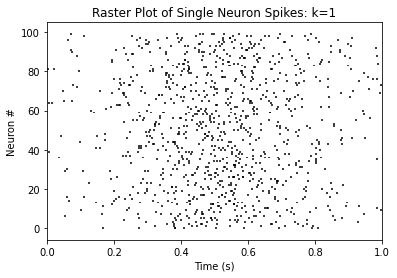

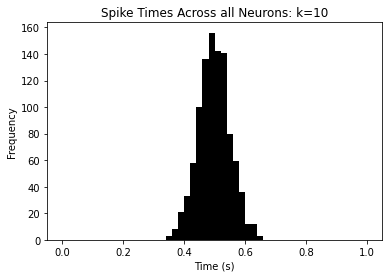

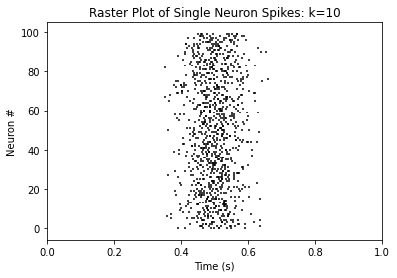

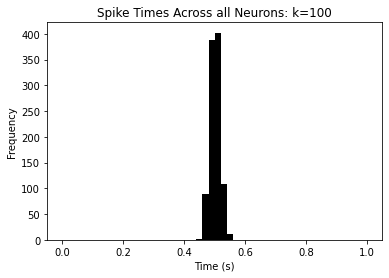

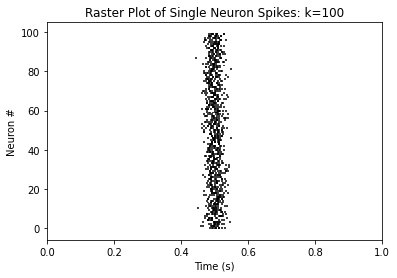

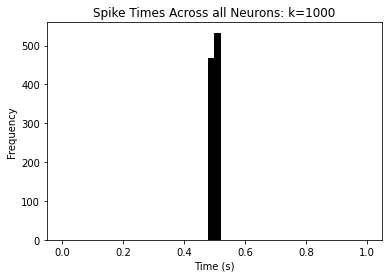

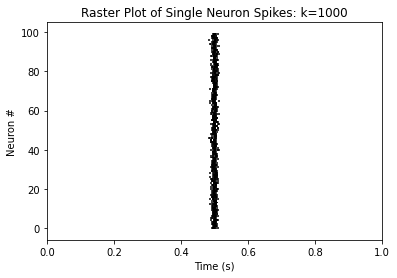

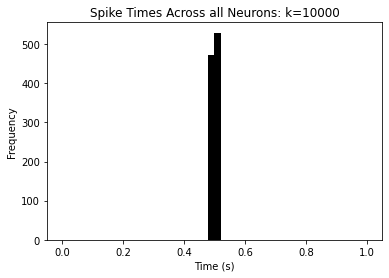

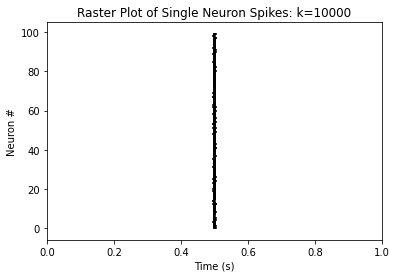

In [4]:
for ii in range(len(ks)):
  spikes,t,spike_times = generate_spike_trains(n,firing_rate,ks[ii],duration,dt)

  plt.title("Spike Times Across all Neurons: k=" + str(ks[ii]))
  plt.hist(np.ravel(spike_times),bins=50,range=(0,duration),color='black')
  plt.xlabel("Time (s)")
  plt.ylabel("Frequency")
  plt.show()

  plt.title("Raster Plot of Single Neuron Spikes: k=" + str(ks[ii]))
  plt.eventplot(spike_times,colors='black')
  plt.xlim([0,duration])
  plt.xlabel("Time (s)")
  plt.ylabel("Neuron #")
  plt.show()